# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [8]:
#Formatos de fecha
df['date']= pd.to_datetime(df['date'])

df['date']= df['date'].dt.date
df= df.set_index('date')

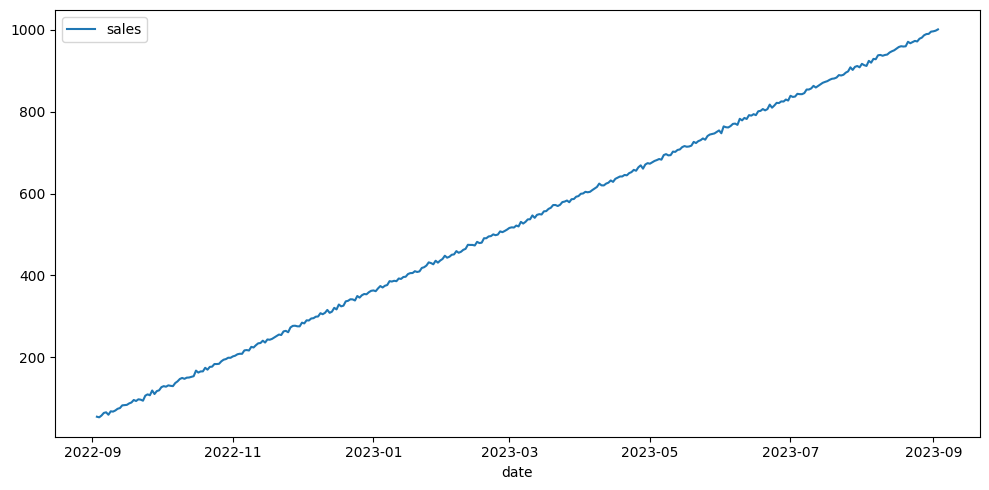

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)

plt.tight_layout()
plt.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicion = seasonal_decompose(df,period=30)

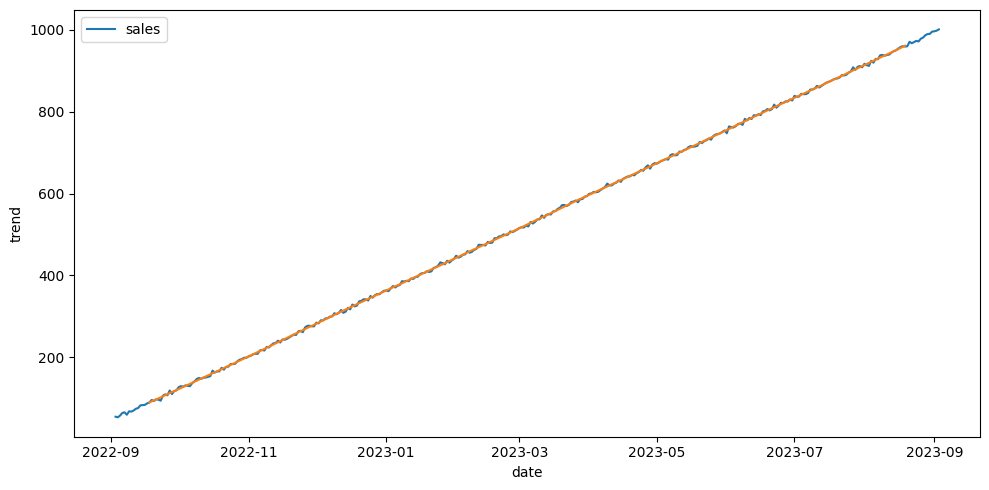

In [11]:
#Parametros
tendencia = decomposicion.trend

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=tendencia)

plt.tight_layout()
plt.show()

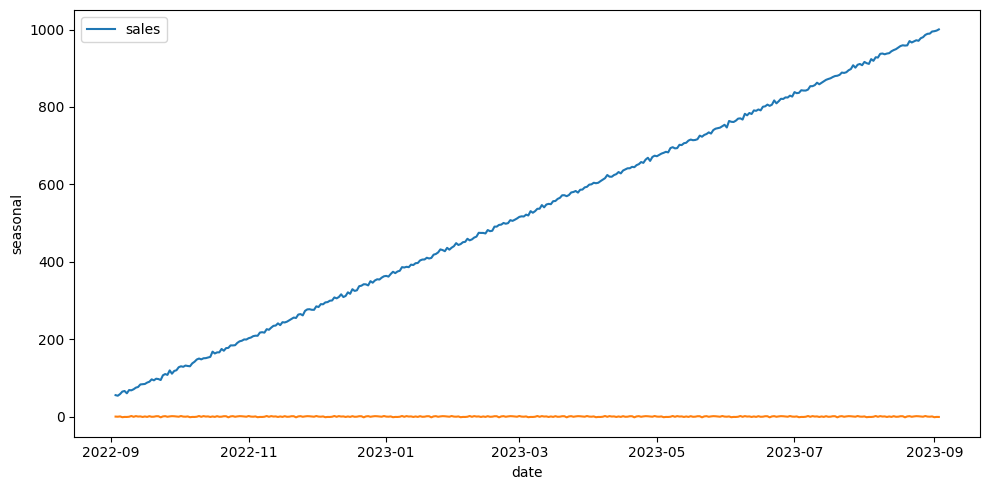

In [12]:
Estacional = decomposicion.seasonal

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=Estacional)

plt.tight_layout()
plt.show()

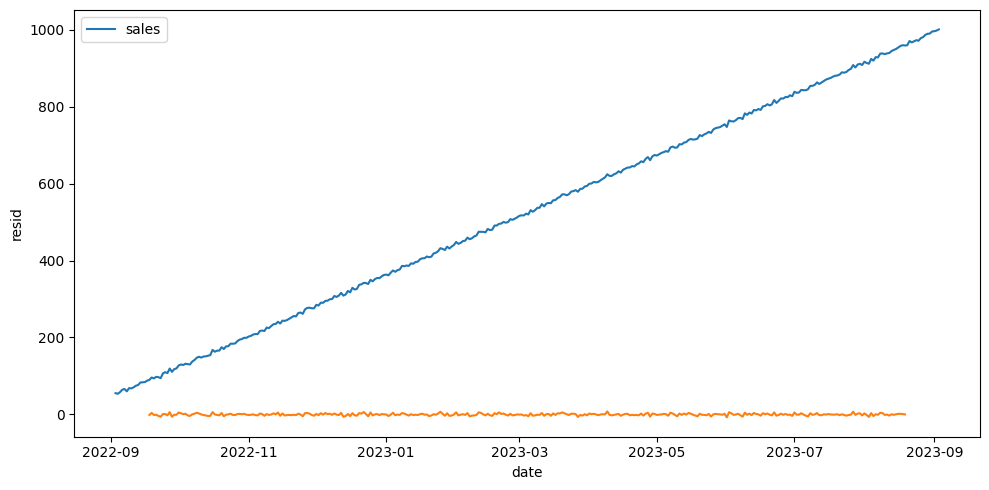

In [13]:
Ruido= decomposicion.resid
plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=Ruido)

plt.tight_layout()
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

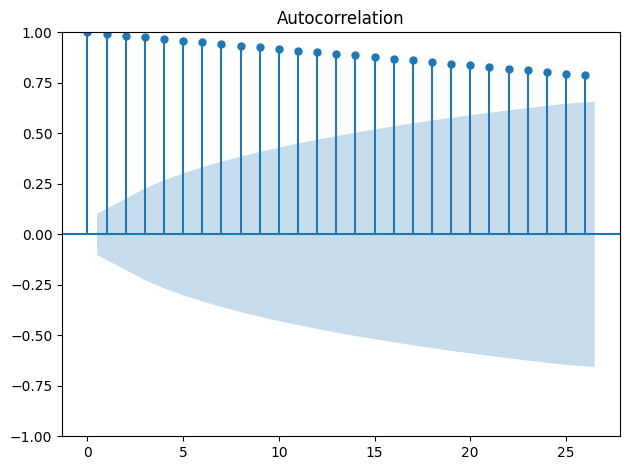

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)
plt.tight_layout()
plt.show()

In [16]:
#Modelo ARIMA
#pip install pmdarima
df_stationary = df.diff().dropna()
test_stationarity(df_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [17]:
from pmdarima import auto_arima

model = auto_arima(df_stationary, seasonal=False, trace=True,m=30)


/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (30) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1854.829, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2209.657, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2205.881, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2208.143, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1857.381, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1843.049, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1843.587, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1841.533, Time=0.28 sec
 A

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Mon, 13 May 2024   AIC                           1839.553
Time:                        03:25:41   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
#Para separar fechas para train y test
train_df= df_stationary[df_stationary.index<pd.to_datetime('2023-07-03').date()]
test_df= df_stationary[df_stationary.index>=pd.to_datetime('2023-07-03').date()]

In [22]:
model = auto_arima(train_df, seasonal=False, trace=True,m=30)

/home/vscode/.local/lib/python3.10/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (30) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1836.646, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1832.975, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1835.166, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1809.840, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1765.200, Time=0.03 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1733.159, Time=0.05 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1703.800, Time=0.08 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1573.418, Time=0.20 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1578.003, Time=0.09 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1537.610, Time=0.57 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1536.455, Time=0.49 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1535.5

In [23]:
forecast = model.predict(63)

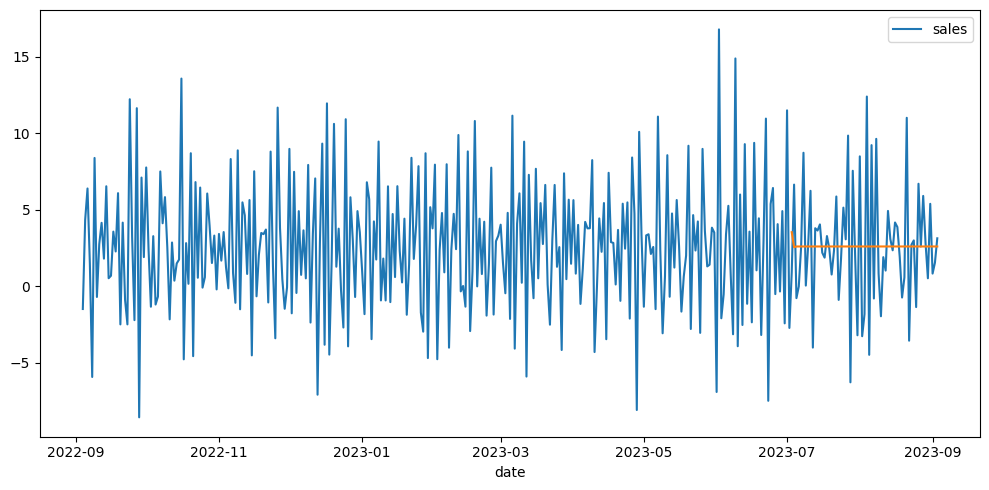

In [24]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=df_stationary)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

print(mean_squared_error(test_df, forecast))
print(r2_score(test_df, forecast))

14.81322361575712
-0.004775053924978456


In [30]:
#Nuevo intento
train_df= df[df.index<pd.to_datetime('2023-08-25').date()]
test_df= df[df.index>=pd.to_datetime('2023-08-25').date()]

model = auto_arima(train_df,seasonal=True,trace=True,m=7)
forecast= model.predict(10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1796.137, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2045.823, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1918.834, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2153.559, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=1792.569, Time=0.67 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=1795.990, Time=0.22 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=1791.806, Time=1.28 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=1793.442, Time=1.39 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=1792.945, Time=1.94 sec
 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=1790.301, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1796.944, Time=0.24 sec
 ARIMA(1,1,2)(2,0,0)[7] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=inf, T

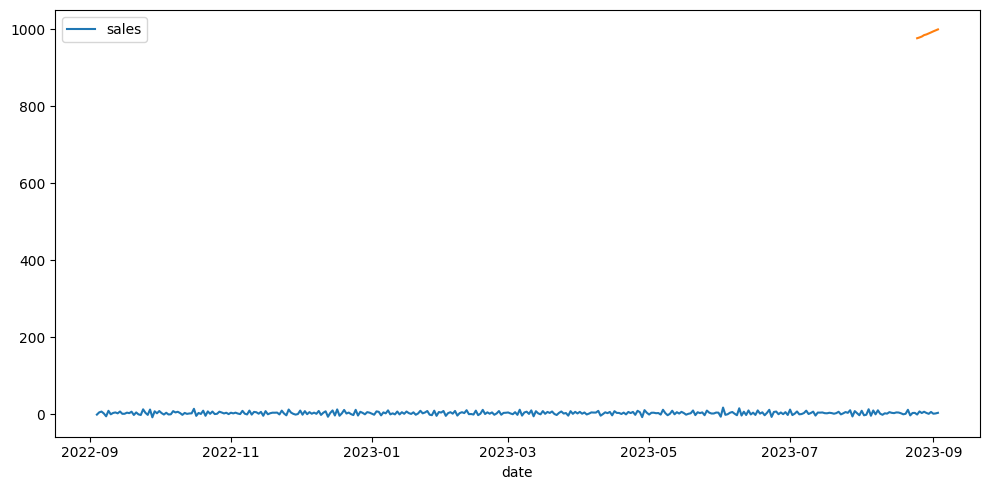

In [31]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=df_stationary)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

In [32]:
print(mean_squared_error(test_df, forecast))
print(r2_score(test_df, forecast))

5.966550067553355
0.9263828922018011


In [33]:
from pickle import dump
dump(model, open("../models/ARIMA_seasonal_trace_m=7.sav", "wb"))